<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/Lab_6_2_K_Means_Bad_Cases_170623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [ ]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [ ]:
## Create data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [ ]:
## Convert data into a DataFrame

# Declare the column names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [ ]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean     0.000947    0.004017
std      0.525198    0.524711
min     -1.067877   -1.037678
25%     -0.298118   -0.279224
50%      0.015387   -0.009820
75%      0.289255    0.279199
max      1.086040    1.073538

Sample of X__________________________________________________
          A         B
0  0.865725  0.395901
1  0.247681 -0.174429
2 -0.079943 -0.252276
3 -0.042848  0.300752
4  0.610788  0.642220


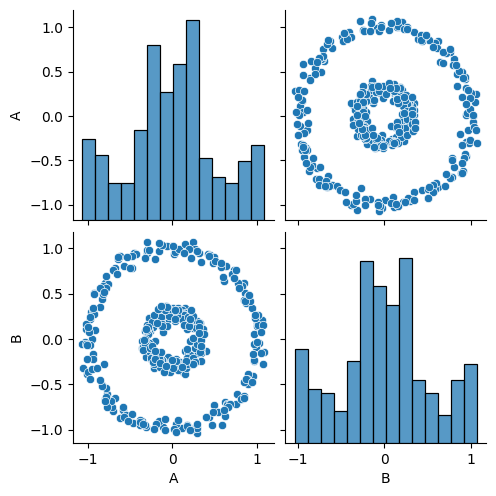

In [ ]:
sbn.pairplot(X)
plt.show()

* X is a DataFrame with 400 rows and 2 columns
* The data in columns A and B are of numeric (float) types
* The dataset is complete, with no missing values or null entries
* Column A has a mean of approximately -0.0014 and a standard deviation of around 0.52
* Column B has a mean of approximately 0.0005 and a standard deviation of about 0.52
* The minimum and maximum values for column A are approximately -1.06 and 1.12, respectively
* The minimum and maximum values for column B are approximately -1.10 and 1.02, respectively
* The data in both columns are relatively centered around zero, as indicated by the mean values
* The dispersion of the data is moderate, as suggested by the standard deviation values
* Further analysis may be needed to examine the specific distributional characteristics and identify any outliers or unusual patterns in the data

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

Both features A and B can be used to cluster the data points

In [ ]:
def print_centroids(centroids):
    global step
    if show_steps:
        print('(Step) Step %d' % step)
        for c in centroids:
            print(', '.join(['%.3f' % f for f in c]))
        step += 1

In [ ]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    return centroids

In [ ]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( np.square(p - q).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [ ]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    return c

In [ ]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')

    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [ ]:
## Flag intermediate output

step = 0
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

(Step) Step 0
-0.837, 0.484
0.270, 0.454
-0.250, 0.506
-0.254, -0.369
0.699, -0.275

(Step) Step 1
-0.871, 0.365
0.337, 0.434
-0.197, 0.445
-0.243, -0.425
0.649, -0.298

(Step) Step 2
-0.889, 0.289
0.382, 0.442
-0.173, 0.428
-0.232, -0.445
0.621, -0.301

(Step) Step 3
-0.898, 0.216
0.414, 0.444
-0.175, 0.426
-0.203, -0.462
0.605, -0.300

(Step) Step 4
-0.910, 0.184
0.432, 0.460
-0.177, 0.415
-0.203, -0.477
0.594, -0.294

(Step) Step 5
-0.921, 0.141
0.456, 0.473
-0.181, 0.402
-0.195, -0.489
0.583, -0.297

(Step) Step 6
-0.926, 0.125
0.475, 0.498
-0.181, 0.387
-0.200, -0.502
0.561, -0.293

(Step) Step 7
-0.926, 0.125
0.506, 0.536
-0.163, 0.372
-0.205, -0.511
0.548, -0.288

(Step) Step 8
-0.926, 0.125
0.563, 0.575
-0.143, 0.353
-0.207, -0.522
0.530, -0.294

(Step) Step 9
-0.921, 0.141
0.629, 0.637
-0.116, 0.334
-0.206, -0.530
0.521, -0.294

(Step) Step 10
-0.909, 0.169
0.643, 0.657
-0.097, 0.323
-0.206, -0.530
0.524, -0.299

(Step) Step 11
-0.897, 0.201
0.643, 0.657
-0.090, 0.311
-0.205, 

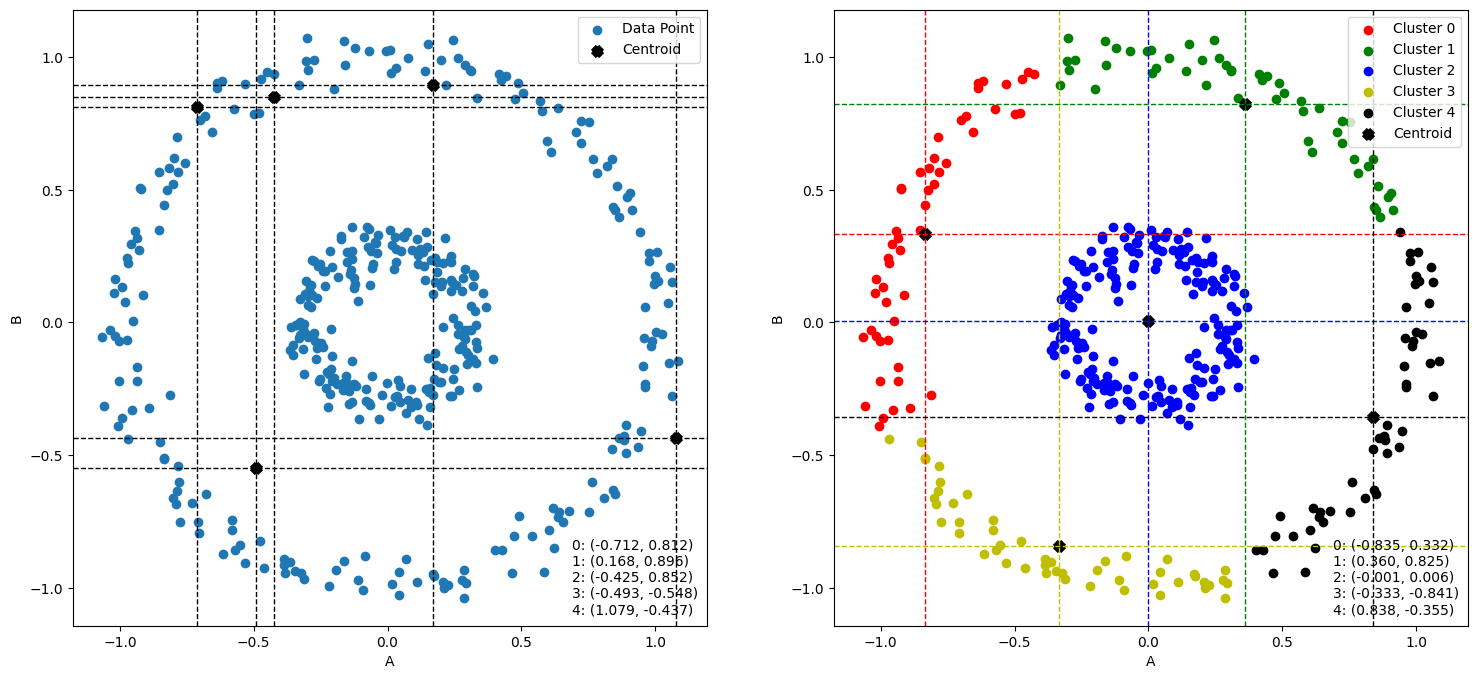

In [ ]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 5

# List the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# Plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# Repeat until there are no moves
step = 0
while True:
    print("(Step) Step", step)
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis=1).values

    # Move the known assignment to the previous state for post-comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if np.array_equal(old_c, centroids):
        break

    step += 1

    # Print the current centroid values
    for c in centroids:
        print(f"{c[0]:.3f}, {c[1]:.3f}")
    print()

# Plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()


### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

# Multiple runs of the algorithm:

* Running the algorithm multiple times can result in different solutions due to random initialisation of cluster centroids
* Each run may converge to a different local optimum, leading to different cluster assignments and centroid positions
* It is common to run the algorithm multiple times and choose the solution with the lowest within-cluster sum of squares (WCSS) as the final result


# Changing the value of K:

* Increasing K tries to capture more detailed patterns by creating more clusters
* Each data point will be assigned to a cluster, and clusters may become more specific and localised
* However, increasing K can risk overfitting the data and creating clusters with very few data points
* Decreasing K merges clusters to form larger clusters
* This can result in the loss of finer-grained patterns and distinctions within the data
* Smaller clusters may be merged together, potentially leading to the loss of important information
* The choice of K should consider domain knowledge, problem requirements, and the trade-off between capturing detailed patterns and creating meaningful clusters
* Evaluation metrics like WCSS, silhouette score, or visual inspection can help determine the appropriate value of K

>

>

>



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



